/Users/christinayi/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Train shape: (11314, 500) Test shape: (7532, 500)


/Users/christinayi/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 37s 252ms/step - accuracy: 0.0863 - loss: 2.9626 - val_accuracy: 0.1379 - val_loss: 2.7148
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 47s 331ms/step - accuracy: 0.2199 - loss: 2.4160 - val_accuracy: 0.3341 - val_loss: 1.9845
Epoch 3/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 49s 344ms/step - accuracy: 0.3849 - loss: 1.8680 - val_accuracy: 0.4688 - val_loss: 1.6015
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 46s 326ms/step - accuracy: 0.5303 - loss: 1.4530 - val_accuracy: 0.5157 - val_loss: 1.5049
Epoch 5/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 46s 321ms/step - accuracy: 0.6323 - loss: 1.1303 - val_accuracy: 0.5718 - val_loss: 1.3101
Epoch 6/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 45s 320ms/step - accuracy: 0.7236 - loss: 0.8632 - val_accuracy: 0.5259 - val_loss: 1.5231
Epoch 7/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 47s 329ms/step - accuracy: 0.7658 - loss: 0.7772 - val_accuracy: 0.6164 - val_loss: 1.2241
Epoch 8/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 47s 329ms/step - accuracy: 0.8255 - loss: 0

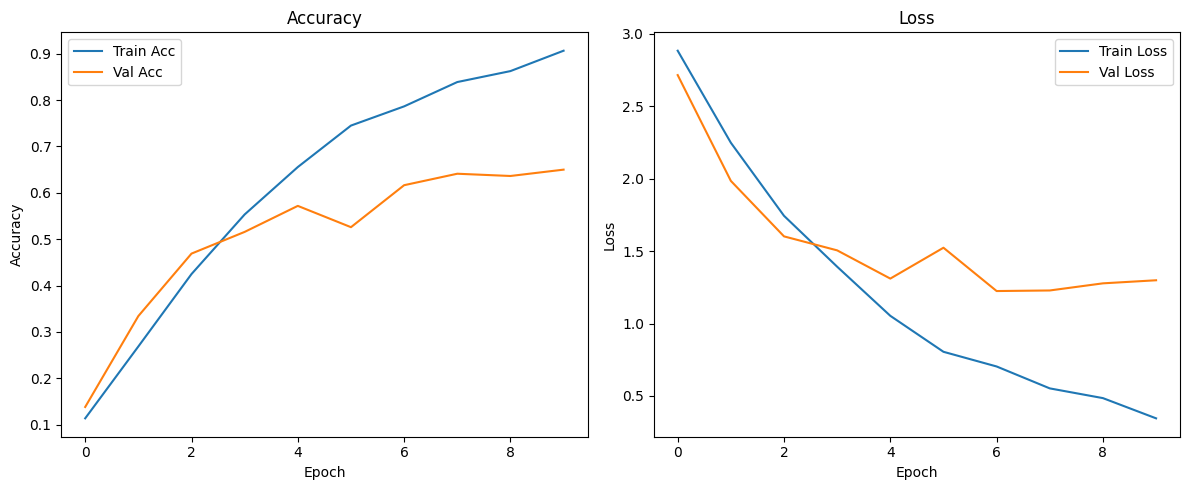

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Parameters
max_features = 10000   # top N words
max_len = 500          # max sequence length
batch_size = 64
epochs = 10

# Load 20 Newsgroups train & test
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test  = fetch_20newsgroups(subset='test')

X_train_texts, y_train = newsgroups_train.data, newsgroups_train.target
X_test_texts,  y_test  = newsgroups_test.data,  newsgroups_test.target

# Tokenize & convert to sequences
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train_texts)
X_train_seq = tokenizer.texts_to_sequences(X_train_texts)
X_test_seq  = tokenizer.texts_to_sequences(X_test_texts)

# Pad to uniform length
X_train = pad_sequences(X_train_seq, maxlen=max_len)
X_test  = pad_sequences(X_test_seq,  maxlen=max_len)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# Build model
model = keras.Sequential([
    layers.Embedding(input_dim=max_features, output_dim=128, input_length=max_len),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dropout(0.5),
    layers.Dense(len(newsgroups_train.target_names), activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

# Train with 20% validation split
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    verbose=1
)

# Predict on test set
y_pred_prob = model.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred_prob, axis=1)

# Compute metrics
test_acc  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')
f1        = f1_score(y_test, y_pred, average='weighted')

print(f"\nTest Accuracy: {test_acc*100:.2f}%")
print(f"Precision:    {precision:.4f}")
print(f"Recall:       {recall:.4f}")
print(f"F1 Score:     {f1:.4f}")

# Plot training history
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
